## Healthcare for All

Your task as a data analyst is to help improve the process by developing machine learning models to predict the gift amount based on X features. Follow the data analysis workflow to build the model.

In this business case, you have a data of donors from previous campaings. We want to use this data to send mail promoting the campaign, the problem is that the cost of each mail is 0.68$ and there are over 95.000 donors in the database, so it is not viable to mail every donor.

You're manager also informed you that in previous research it was discovered that sending mail to the most likely donors would increase the probability of the donation, while sending mail to the least likely donors would not impact on the probability of the donation. Therefore, your focus should be sending mail to the most likely donors.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### Checking Dataset

In [2]:
data = pd.read_excel('c://Users/ilike/1.data/lab-cleaning-numerical-data/4.01_dataset.xlsx')
data#.head()

,CONTROLN,STATE,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,RFA_2,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D
0,95515,IL,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,L4E,31,4.0,10.0,7.741935,0.0
1,148535,CA,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,L2G,3,18.0,25.0,15.666667,0.0
2,15078,NC,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,L4E,27,12.0,5.0,7.481481,0.0
3,172556,CA,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,L4E,16,9.0,10.0,6.812500,0.0
4,7112,FL,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,L2F,37,14.0,15.0,6.864865,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,184568,AK,XXXX,,M,C2,NaN,,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,L1G,1,NaN,25.0,25.000000,0.0
95408,122706,TX,XXXX,,M,C1,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,L1F,1,NaN,20.0,20.000000,0.0
95409,189641,MI,XXXX,X,M,C3,NaN,,376,377,4,3,263,264,319,345,12178,,33,14,7,17,L3E,7,3.0,10.0,8.285714,0.0
95410,4693,CA,XXXX,,F,C1,7.0,H,2421,2459,11,10,552,544,568,556,15948,,127,36,9,31,L4F,41,4.0,18.0,12.146341,18.0


In [3]:
data.shape

(95412, 28)

In [4]:
data.describe()

,CONTROLN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D
count,95412.000000,74126.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,85439.000000,95412.000000,95412.000000,95412.000000
mean,95778.176959,3.886248,1061.838238,1133.031086,4.224249,3.875886,340.056387,387.027114,387.418302,430.792961,15722.738230,46.973347,18.435144,5.348939,12.856936,9.602031,8.093739,17.313127,13.347786,0.793073
std,55284.596094,1.854960,941.765892,947.384618,2.307938,2.244389,162.883283,173.614627,161.270738,171.643319,8563.646776,22.970378,8.583794,1.219785,4.544033,8.554342,8.213242,13.956630,10.769997,4.429725
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.285714,0.000000
25%,47910.750000,2.000000,513.000000,555.000000,3.000000,2.000000,231.000000,274.000000,277.000000,314.000000,10788.000000,27.000000,11.000000,5.000000,11.000000,3.000000,4.000000,10.000000,8.384615,0.000000
50%,95681.500000,4.000000,737.000000,803.000000,4.000000,3.000000,310.000000,355.000000,354.000000,397.000000,13727.500000,47.000000,18.000000,6.000000,12.000000,7.000000,6.000000,15.000000,11.636364,0.000000
75%,143643.500000,5.000000,1213.000000,1328.250000,5.000000,5.000000,414.000000,465.000000,466.000000,514.000000,18169.000000,64.000000,25.000000,6.000000,13.000000,13.000000,11.000000,20.000000,15.477955,0.000000
max,191779.000000,7.000000,6000.000000,6000.000000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,174523.000000,195.000000,61.000000,19.000000,78.000000,237.000000,1088.000000,1000.000000,1000.000000,200.000000


In [5]:
# Checking for nulls:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls[nulls['percentage'] > 0].sort_values('percentage', ascending = False)

,percentage
INCOME,22.309563
TIMELAG,10.452564


The columns might be important factors in predicting the gift value, so even though it has a lot of null values, we will not drop them, at least not before checking correlations.

In [6]:
# Checking correlations with the target:
data.corr()['TARGET_D'].sort_values(ascending=False)

TARGET_D    1.000000
LASTGIFT    0.061678
AVGGIFT     0.044299
HV2         0.039860
HV1         0.039081
IC5         0.037328
IC4         0.035952
IC2         0.035496
IC3         0.033786
INCOME      0.032063
IC1         0.031780
HV3         0.030915
HV4         0.030867
NUMPRM12    0.025134
NUMPROM     0.017337
CARDPM12    0.016358
CONTROLN    0.013366
CARDPROM    0.011302
NGIFTALL    0.004899
TIMELAG     0.003612
Name: TARGET_D, dtype: float64

In [7]:
data.corr()['TARGET_D'][['INCOME', 'TIMELAG']]

INCOME     0.032063
TIMELAG    0.003612
Name: TARGET_D, dtype: float64

### Dealing with NaNs

What are some ways to cope with the null values? When should you use each one?

1 - We might loose up to ~32% of the data if dropping the NaNs (rows). The trade-off here is between the amount of data vs data quality.

2 - The columns have some correlation with the target (comparatively) so I wouldn't drop them. The trade-off here is between the feature importance vs data quality.

3 - For Income, we could fill the NaNs with 0, since the minimum value for Income in the df is 1 and we'd expect people without income. Therefore we assume that the NaNs are from people without income.

4 - To contain the data quality decrease when "making up" data, I wouldn't transform the NaNs into zeros for TimeLag. Using the mean/median will "maintain" our distributions. (I like mean, but median might work better if you have expressive outliers)

5 - You can also use Interpolation techniques - using information from other columns/rows to find the value to replace.

### Filling NaNs for categorical columns

How could we find out gender value when this field is null?

In [8]:
data['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [9]:
data['GENDER'] = data['GENDER'].apply(lambda x: x if x in ['M', 'F'] else 'O')

data['GENDER'].value_counts()

# Another option would have been to fill the nans with the mode (highest count category, in this case F)

F    51277
M    39094
O     5041
Name: GENDER, dtype: int64

The Homeownership has two values [H = Homeowner, U = Unknown]. If you had to fill null values, how would it be?

In [10]:
data['HOMEOWNR'].value_counts()

H    52354
     22228
U    20830
Name: HOMEOWNR, dtype: int64

In this case, makes sense that the missing data is converted to U (unknown), since it is a class that already exists and if the value is missing you don't know if the person is a home owner.

In [11]:
data['HOMEOWNR'] = np.where(data['HOMEOWNR'] != 'H', 'U', 'H')
data['HOMEOWNR'].value_counts()

H    52354
U    43058
Name: HOMEOWNR, dtype: int64

### Filling NaNs for numerical columns

#### Using Mean or Median

0         4.0
1        18.0
2        12.0
3         9.0
4        14.0
         ... 
95407     NaN
95408     NaN
95409     3.0
95410     4.0
95411     6.0
Name: TIMELAG, Length: 95412, dtype: float64

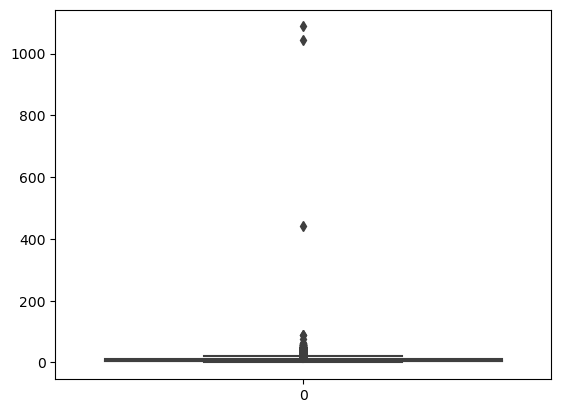

In [12]:
# best plot to check for outliers
# best plot to check for outliers
sns.boxplot(data['TIMELAG'])
data['TIMELAG']

In [13]:
data['TIMELAG'].median(), data['TIMELAG'].mean()

(6.0, 8.093739393017241)

In [14]:
# for 'TIMELAG' I'll choose median to replace the NaNs
# since we have considerable outliers as we saw in .describe() and in the plot above
data['TIMELAG'] = data['TIMELAG'].fillna(data['TIMELAG'].median())


#### Interpolation

For interpolation techniques, the order of the row matter, so it might make sense to use them in specific cases. I don't see a column that could perfectly benefit from interpolation, so I'm using "Income" to demonstrate.

<Axes: >

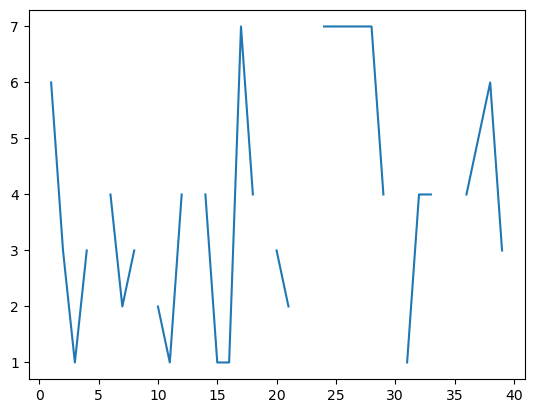

In [15]:
data['INCOME'][0:40].plot()

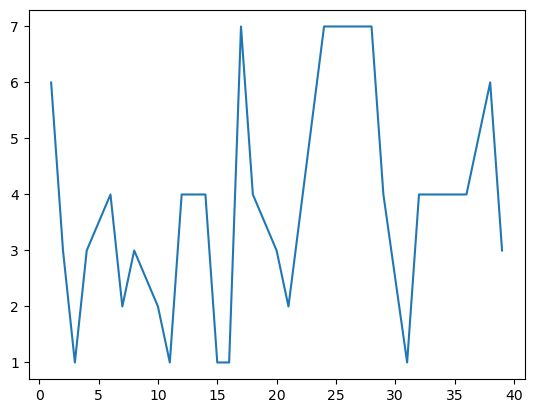

In [16]:
new_income_data = data['INCOME'][0:40].interpolate(method='linear')
# linear interpolation assumes that the rate of change between the values is constant
new_income_data.plot()
plt.show()

#### Comparing distributions to choose which technique to use:

It's not wise to make a decision based on 'how it looks on the plot'. When we learn about p-values we'll see how to check for normality with an actual metric.

Want a better understanding of polynomial method? Here is something to [read](https://whatis.techtarget.com/definition/polynomial-interpolation).

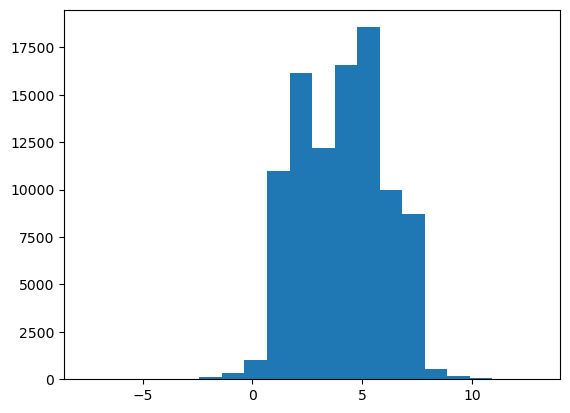

In [17]:
# you can try different methods and check which ones are more normally distributed
plt.hist(data['INCOME'].interpolate(method='polynomial', order=2), bins=20)
plt.show()

In [18]:
# Above we used interpolation on "Income" just for demonstration.
# We will be replacing the nulls with 0, assuming that is what would the data be in "real life":
data['INCOME'].value_counts()

5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

In [19]:
data['INCOME'] = data['INCOME'].fillna(0)
data['INCOME'].isna().sum()

0

### Checking outliers

We start checking for outliers on the target variable:

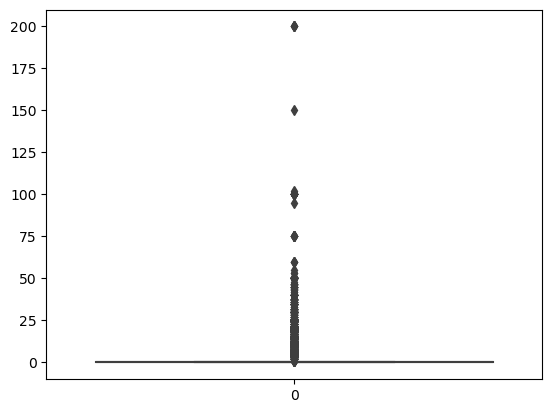

In [20]:
# best plot to check for outliers
sns.boxplot(data['TARGET_D'])
plt.show()

<Axes: xlabel='TARGET_D', ylabel='Density'>

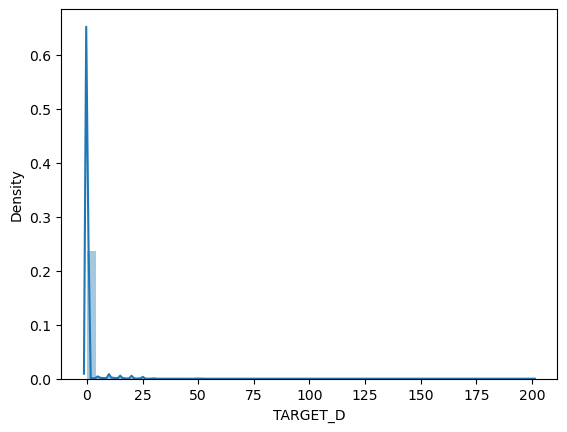

In [21]:
# getting a better look at the distribution:
sns.distplot(data['TARGET_D'])

We have a big spike at zeros, because most donors did not donate on the previous campaign.

In [22]:
# An interesting insight, is that about 95% of the donors, did not donate in the previous compaign
data[data['TARGET_D'] == 0]

,CONTROLN,STATE,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,RFA_2,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D
0,95515,IL,XXXX,,F,T2,0.0,U,479,635,3,2,307,318,349,378,12883,,74,27,6,14,L4E,31,4.0,10.0,7.741935,0.0
1,148535,CA,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,L2G,3,18.0,25.0,15.666667,0.0
2,15078,NC,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,L4E,27,12.0,5.0,7.481481,0.0
3,172556,CA,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,L4E,16,9.0,10.0,6.812500,0.0
4,7112,FL,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,L2F,37,14.0,15.0,6.864865,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95406,35088,FL,XXXX,,F,S2,6.0,H,733,875,4,3,285,288,333,334,11390,,59,23,5,12,L4D,24,3.0,2.0,3.375000,0.0
95407,184568,AK,XXXX,,M,C2,0.0,U,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,L1G,1,6.0,25.0,25.000000,0.0
95408,122706,TX,XXXX,,M,C1,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,L1F,1,6.0,20.0,20.000000,0.0
95409,189641,MI,XXXX,X,M,C3,0.0,U,376,377,4,3,263,264,319,345,12178,,33,14,7,17,L3E,7,3.0,10.0,8.285714,0.0


<Axes: xlabel='TARGET_D', ylabel='Density'>

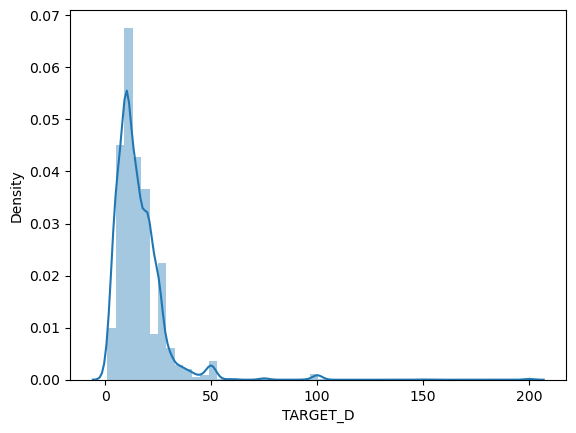

In [23]:
# So, let's take a look at the distribution without the zeros, to better determine outliers:
sns.distplot(data[(data['TARGET_D'] > 0)]['TARGET_D']) #  & (data['TARGET_D'] < 50)

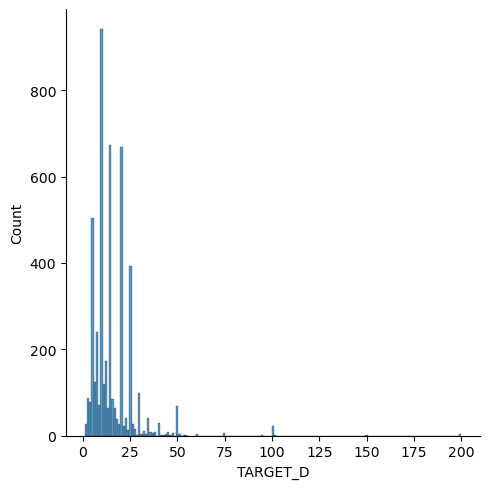

In [24]:
sns.displot(data[data['TARGET_D'] > 0]['TARGET_D'])

In [25]:
# out of all the donors, very few donated above 50, so maybe we can consider those outliers:
print("Donors:", len(data[(data['TARGET_D'] > 0)]))
print("Donations > 50:", len(data[data['TARGET_D'] > 50]))

Donors: 4843
Donations > 50: 46


You can also check for outliers on the features, but I'd leave that for later and only if we really need it. Example:

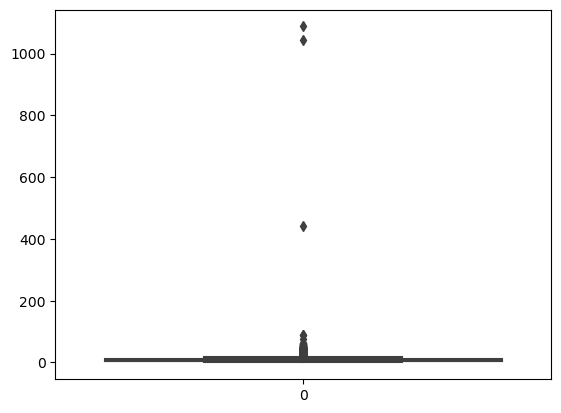

In [26]:
sns.boxplot(data['TIMELAG'])
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
x = pd.get_dummies(data.drop(['CONTROLN','TARGET_D'],axis=1))
y = data['TARGET_D']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

The above plot could serve as some interesting insight about the timelag from last donation.

### Getting a benchmark model

Before trying different scaling techniques and further "improving" our dataset, I like to get a benchmark to compare results and make sure that the changes we do in our dataset is actually improving our model.

For the benchmark model I only deal with the nans and dummify the categoricals:

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = pd.get_dummies(data.drop(['CONTROLN', 'TARGET_D'], axis=1))
y = data['TARGET_D']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.00564043023550076
MAE: 1.5157205690576085
RMSE: 4.526386878754425


For the first step, we might want to focus on the R2, since it will tell us how well the model fits the data, but don't forget that to really understand the errors from out model, we will also need other metrics, such as MAE and RMSE.

<Axes: xlabel='TARGET_D'>

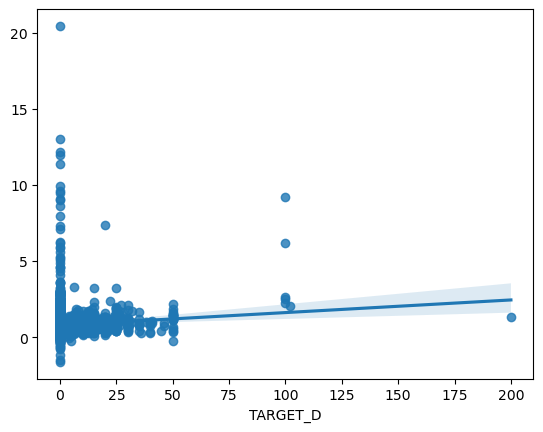

In [28]:
sns.regplot(x=y_test, y=lr.predict(X_test))

In [29]:
# R2 without the zeros:

no_zeros = data[data["TARGET_D"] > 0]
X = pd.get_dummies(no_zeros.drop(['CONTROLN', 'TARGET_D'], axis=1))
y = no_zeros['TARGET_D']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.6027055175206646
MAE: 4.450310430290717
RMSE: 7.6867354502408425


<Axes: xlabel='TARGET_D'>

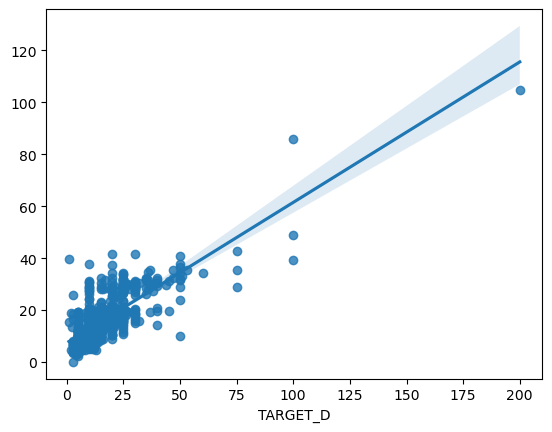

In [30]:
sns.regplot(x=y_test, y=lr.predict(X_test))

In [31]:
# If we removed outliers:

no_zeros = data[(data["TARGET_D"] < 50) & (data["TARGET_D"] > 0)]
X = pd.get_dummies(no_zeros.drop(['CONTROLN', 'TARGET_D'], axis=1))
y = no_zeros['TARGET_D']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.5118332109227334
MAE: 3.8284169362079146
RMSE: 5.598333655247508


<Axes: xlabel='TARGET_D'>

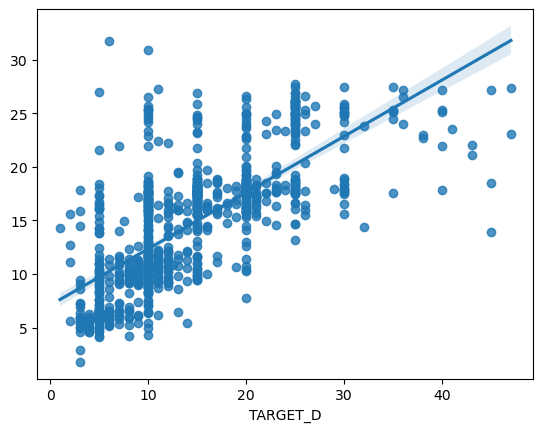

In [32]:
sns.regplot(x=y_test, y=lr.predict(X_test))

**Early conclusions:**
* Apparently, a big problem for this linear regression model is the huge amount of zeros we have, without them we could have decent results;
* Considering the business case, we can make this into a classification problem, where instead of predicting the amount donated, we try to predict if it was donates or not. If predicting the amount is important for the business and depending on how well we can train the classification algorithm, we could train a regression model for those datapoints where a donation is predicted.
* We might want to try other models rather then linear regression (research on zero-inflated models).

### Feature Engineering
Before deciding on dropping or not the outliers, make sure if it makes sense for your business case.
Also, it might be a good idea to try scaling techniques that reduces the gaps between values, such as log or boxcox. These techniques might "smoothen out" the outliers.

#### Scaling

Below there are three techniques for scaling, you would pick only one according to your dataset. Scaling helps the model to converge by decreasing the distance between the values, which might make training cheaper, so it might be a nice to have even when the model doesn't require it. Besides improving model computational performance, it might also increase the test metrics.

In [33]:
# considering my early conclusions, let's focus on the rows where there was a donation:
data1 = data[data["TARGET_D"] > 0]

# apply log transformation on numerical values, since it will make the 'outliers' interval smaller
# because we have a lot of zeros, and log of zero is undefined, we will add one to all values before scaling

numericals_log = data1.select_dtypes(np.number)
numericals_log = numericals_log.applymap(lambda x: np.log(x+1))

Why log? Easier to see skewed/exponential data, since the log is the inverse of the exponential. Also, it decreases variability.


<Axes: xlabel='TARGET_D', ylabel='Density'>

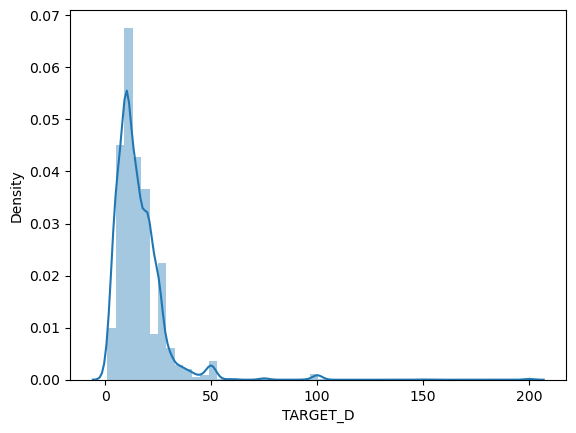

In [34]:
# before scaling:
sns.distplot(data[data['TARGET_D'] > 0]['TARGET_D'])

<Axes: xlabel='TARGET_D', ylabel='Density'>

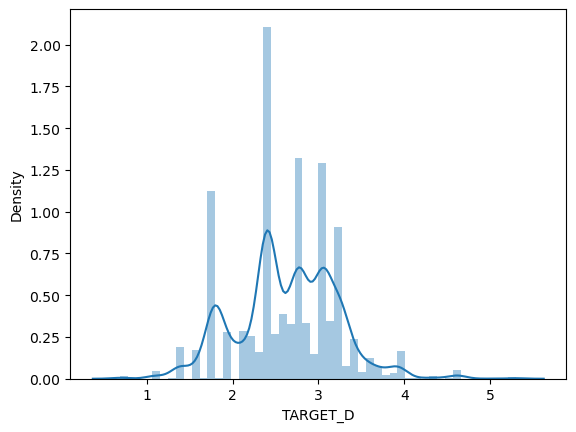

In [35]:
# after scaling:
sns.distplot(numericals_log['TARGET_D'])

**Disclaimer:** I filtered out the zeros from the two plots above so we could see the effect on the distribution of the column.

##### Standardization/Standard Scaler

For each column, each value in the column is subtracted by the mean of the column and then divided by the standard deviation.

Works row wise, so it takes information from the whole column. It is wise to do the train/test split beforehand.

You will .fit() on the training set and then .transform() both (train and test).

In [36]:
from sklearn.preprocessing import StandardScaler
import pickle

numericals_ = data1.select_dtypes(np.number)

X = numericals_.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = numericals_["TARGET_D"]

X_train_num, X_test_num, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Pickle - you'll use it at least for these steps:
# to save the scaler
# to save the encoder
# to save the model

X_transformer = StandardScaler()
X_transformer.fit(X_train_num)

# saving in a pickle
with open('/content/drive/MyDrive/Ironhack/dapt_rmt_may_23/unit 4/std_transformer.pickle', 'wb') as file:
    pickle.dump(X_transformer, file)

# loading from a pickle
with open('/content/drive/MyDrive/Ironhack/dapt_rmt_may_23/unit 4/std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_std = loaded_transformer.transform(X_train_num)
X_test_std = loaded_transformer.transform(X_test_num)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Ironhack/dapt_rmt_may_23/unit 4/std_transformer.pickle'

##### Normalizer

For each column, each value is divided by the magnitude of the column. The magnitude is calculated as the euclidean distance.

It is calculated column wise, so it takes the values of a whole row to calculate. It is wise to do the X/y split beforehand.

When using Normalizer() you might lose considerable amount of information in the dummified columns. So it might be a good idea to take the categorical columns out before scaling, and then concatenating them together again, but watch out because that too will have consequences to your model.

In [44]:
from sklearn.preprocessing import Normalizer

X = numericals_.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = numericals_["TARGET_D"]

transformer = Normalizer()
x_normalized = transformer.fit_transform(X)

X_train_norm, X_test_norm, y_train, y_test = train_test_split(x_normalized, y, test_size=0.20, random_state=42)

**REMEMBER:** if you scaled your data to train the model, you'll have to apply the same scale to the new data you'll be getting the predictions from.

**ALSO:** you might need to un-scale it for better readability (specially if you scaled the target variable).

Some more clarification on where to use which [here](https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048).

##### Thoughts after scaling:
At this point it's early to say which scaling technique works best. After preparing the categorical variables we can test our different scaling techniques and compare with the metrics from the models we train.

OBS.: Document your work or you'll get lost in it :)

Now let's check which scaling technique is best for our regression model:

In [45]:
# With Log scaling:

X = numericals_log.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = numericals_log['TARGET_D']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train_log, y_train_log)
print("R2:", lr.score(X_test_log, y_test_log))
print("MAE:", mean_absolute_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log)))
print("RMSE:", mean_squared_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log), squared=False))

R2: 0.6211659136644195
MAE: 4.187748474173338
RMSE: 8.406792685934409


<Axes: xlabel='TARGET_D'>

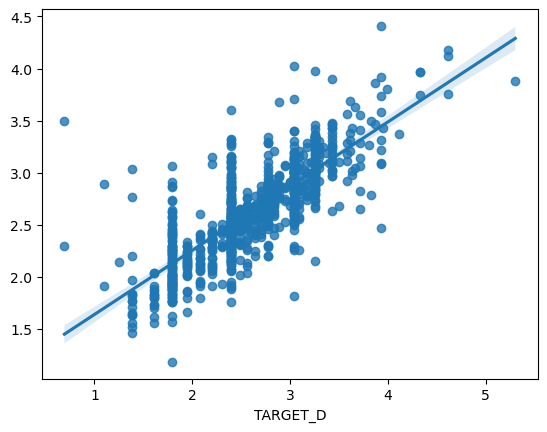

In [46]:
sns.regplot(x=y_test_log, y=lr.predict(X_test_log))

In [47]:
# With StandardScaler:

lr = LinearRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test_std), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test_std), y_test, squared=False))

NameError: name 'X_train_std' is not defined

In [48]:
sns.regplot(x=y_test, y=lr.predict(X_test_std))

NameError: name 'X_test_std' is not defined

In [ ]:
# With Normalizer:

lr = LinearRegression()
lr.fit(X_train_norm, y_train)
print("R2:", lr.score(X_test_norm, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test_norm), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test_norm), y_test, squared=False))

In [ ]:
sns.regplot(x=y_test, y=lr.predict(X_test_norm))

For now, we can assume that the best scaling technique for this dataset would be Log or StandardScaler (depending on other metrics such as MAE and RMSE).

#### Feature Engineering Categorical Variables

In this step we will check if it is possible to reduce the amount of columns generated by the encoding of the categorical variables using different techniques.

In [49]:
# A quick peek at categorical variables:

for col in data.select_dtypes('object'):
  display(data[col].value_counts())
  print()

CA    17343
FL     8376
TX     7535
IL     6420
MI     5654
NC     4160
WA     3577
GA     3403
IN     2980
WI     2795
MO     2712
TN     2492
AZ     2407
OR     2183
MN     2175
CO     2032
SC     1759
AL     1705
KY     1620
OK     1617
LA     1594
KS     1294
IA     1271
AR     1020
MS      986
NV      979
NM      877
NE      754
UT      569
ID      533
MT      527
HI      449
SD      301
WY      283
AK      282
ND      260
AP       81
NY       71
VA       55
OH       52
PA       38
MD       34
NJ       26
MA       25
CT       23
AA       18
AE       15
ME       11
NH        8
VT        7
RI        6
VI        5
WV        4
GU        4
DE        3
DC        1
AS        1
Name: STATE, dtype: int64

XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

     93395
X     2017
Name: RECP3, dtype: int64

F    51277
M    39094
O     5041
Name: GENDER, dtype: int64

R2    13623
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
       2316
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

H    52354
U    43058
Name: HOMEOWNR, dtype: int64

     84986
Y    10426
Name: VETERANS, dtype: int64

L1F    30380
L1G    12384
L2F    10961
L3E     7767
L2E     4989
L4D     4914
L1E     4911
L2G     4595
L4E     3972
L3F     3523
L3D     2498
L4F     2100
L3G     1503
L4G      915
Name: RFA_2, dtype: int64

##### Bucketing

When we have too many categories, and some have low occurrence, we can bucket them into one category. We already bucketed HOMEOWNR and GENDER when dealing with the Nans.

In [50]:
# just taking a look at the categories and counts, making a series to work with later:
states_count = pd.Series(data['STATE'].value_counts(), name='counts')
states_count

CA    17343
FL     8376
TX     7535
IL     6420
MI     5654
NC     4160
WA     3577
GA     3403
IN     2980
WI     2795
MO     2712
TN     2492
AZ     2407
OR     2183
MN     2175
CO     2032
SC     1759
AL     1705
KY     1620
OK     1617
LA     1594
KS     1294
IA     1271
AR     1020
MS      986
NV      979
NM      877
NE      754
UT      569
ID      533
MT      527
HI      449
SD      301
WY      283
AK      282
ND      260
AP       81
NY       71
VA       55
OH       52
PA       38
MD       34
NJ       26
MA       25
CT       23
AA       18
AE       15
ME       11
NH        8
VT        7
RI        6
VI        5
WV        4
GU        4
DE        3
DC        1
AS        1
Name: counts, dtype: int64

In [51]:
# using the series I created above to make a list with the categories that have low accurrence:
group_states = states_count[states_count < 1000].index
group_states

Index(['MS', 'NV', 'NM', 'NE', 'UT', 'ID', 'MT', 'HI', 'SD', 'WY', 'AK', 'ND',
       'AP', 'NY', 'VA', 'OH', 'PA', 'MD', 'NJ', 'MA', 'CT', 'AA', 'AE', 'ME',
       'NH', 'VT', 'RI', 'VI', 'WV', 'GU', 'DE', 'DC', 'AS'],
      dtype='object')

In [52]:
data['STATE'] = data['STATE'].apply(lambda x: 'other' if x in group_states else x)
data['STATE'].value_counts()

CA       17343
FL        8376
TX        7535
other     7288
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
TN        2492
AZ        2407
OR        2183
MN        2175
CO        2032
SC        1759
AL        1705
KY        1620
OK        1617
LA        1594
KS        1294
IA        1271
AR        1020
Name: STATE, dtype: int64

In [55]:
# 
data['MDMAUD'].value_counts()

XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

In [56]:
data[(data['MDMAUD'] != 'XXXX') & (data['TARGET_D'] > 0)][["CONTROLN", "MDMAUD", "TARGET_D"]].sort_values('TARGET_D', ascending=False)

,CONTROLN,MDMAUD,TARGET_D
33804,185080,C1CM,200.0
90715,12573,L2CM,102.0
11554,14064,C1CM,100.0
20247,6183,I1CM,100.0
43126,12330,C1CM,100.0
54521,185052,I1CM,100.0
87049,12361,I1CM,100.0
53400,12312,C1CM,95.0
75526,5742,C1CM,75.0
94040,7402,D1CM,75.0


**Potencially Important Insight:** apparently, the few occurrences of MDMAUD that are different then 'XXXX' comes from high amount donors.

So, we can bucket them into 'XXXX' and 'other' to simplify the information for the model:

In [62]:
data['MDMAUD'] = data['MDMAUD'].apply(lambda x: 'other' if x != 'XXXX' else x)
data['MDMAUD'].value_counts()

XXXX     95118
other      294
Name: MDMAUD, dtype: int64

##### Manual Encoding
We can also do our ouw manual encoding, specially when the categorical column contains some sort of code.

In [63]:
data['DOMAIN'].value_counts()

R2    13623
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
       2316
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

In [64]:
domains = data['DOMAIN'].unique()
domains

array(['T2', 'S1', 'R2', 'S2', 'T1', 'R3', 'U1', 'C2', 'C1', 'U3', ' ',
       'R1', 'U2', 'C3', 'U4', 'S3', 'T3'], dtype=object)

In [65]:
letters = set([i[0] for i in domains if i != ' '])
numbers = set([i[1] for i in domains if i != ' '])
letters, numbers

({'C', 'R', 'S', 'T', 'U'}, {'1', '2', '3', '4'})

In [66]:
data_dom = pd.DataFrame(columns=list(letters)+list(numbers))
data_dom

,C,U,S,R,T,2,4,3,1


In [67]:
data_dom['DOMAIN'] = data["DOMAIN"]
data_dom

,C,U,S,R,T,2,4,3,1,DOMAIN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T2
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R2
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S2
...,...,...,...,...,...,...,...,...,...,...
95407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C2
95408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C1
95409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C3
95410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C1


In [68]:
for col in data_dom.columns:
  data_dom[col] = data_dom['DOMAIN'].apply(lambda x: 1 if col in x else 0)

data_dom = data_dom.drop("DOMAIN", axis=1)
data_dom

,C,U,S,R,T,2,4,3,1
0,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0
3,0,0,0,1,0,1,0,0,0
4,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
95407,1,0,0,0,0,1,0,0,0
95408,1,0,0,0,0,0,0,0,1
95409,1,0,0,0,0,0,0,1,0
95410,1,0,0,0,0,0,0,0,1


Let's do the same for RFA_2:

In [69]:
rfa = data['RFA_2'].unique()
rfa_str = ''.join(rfa)
rfa_str

'L4EL2GL2FL1FL1EL3EL4DL1GL3DL2EL3FL3GL4FL4G'

In [70]:
rfa_unique = set(rfa_str)
rfa_unique

{'1', '2', '3', '4', 'D', 'E', 'F', 'G', 'L'}

In [71]:
data_rfa = pd.DataFrame(columns=list(rfa_unique))
data_rfa['RFA_2'] = data["RFA_2"]
data_rfa

,2,1,E,D,L,3,G,4,F,RFA_2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L4E
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L2G
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L4E
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L4E
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L2F
...,...,...,...,...,...,...,...,...,...,...
95407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L1G
95408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L1F
95409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L3E
95410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L4F


In [72]:
for col in data_rfa.columns:
  data_rfa[col] = data_rfa['RFA_2'].apply(lambda x: 1 if col in x else 0)

data_rfa = data_rfa.drop("RFA_2", axis=1)
data_rfa

,2,1,E,D,L,3,G,4,F
0,0,0,1,0,1,0,0,1,0
1,1,0,0,0,1,0,1,0,0
2,0,0,1,0,1,0,0,1,0
3,0,0,1,0,1,0,0,1,0
4,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
95407,0,1,0,0,1,0,1,0,0
95408,0,1,0,0,1,0,0,0,1
95409,0,0,1,0,1,1,0,0,0
95410,0,0,0,0,1,0,0,1,1


##### Preparing all categorical columns:

In [73]:
# Concatenating everything:

data_categ = pd.concat([data, data_dom, data_rfa], axis=1)
data_categ = data_categ.drop(['DOMAIN', 'RFA_2'], axis=1)
data_categ

,CONTROLN,STATE,MDMAUD,RECP3,GENDER,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D,C,U,S,R,T,2,4,3,1,2,1,E,D,L,3,G,4,F
0,95515,IL,XXXX,,F,0.0,U,479,635,3,2,307,318,349,378,12883,,74,27,6,14,31,4.0,10.0,7.741935,0.0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0
1,148535,CA,XXXX,,M,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,3,18.0,25.0,15.666667,0.0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0
2,15078,NC,XXXX,,M,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,27,12.0,5.0,7.481481,0.0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0
3,172556,CA,XXXX,,F,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,16,9.0,10.0,6.812500,0.0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0
4,7112,FL,XXXX,X,F,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,37,14.0,15.0,6.864865,0.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,184568,other,XXXX,,M,0.0,U,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,1,6.0,25.0,25.000000,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
95408,122706,TX,XXXX,,M,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,1,6.0,20.0,20.000000,0.0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
95409,189641,MI,XXXX,X,M,0.0,U,376,377,4,3,263,264,319,345,12178,,33,14,7,17,7,3.0,10.0,8.285714,0.0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
95410,4693,CA,XXXX,,F,7.0,H,2421,2459,11,10,552,544,568,556,15948,,127,36,9,31,41,4.0,18.0,12.146341,18.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1


In [74]:
# Dummifying the rest:

data_final = pd.get_dummies(data_categ, drop_first=True)
data_final

,CONTROLN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D,C,U,S,R,T,2,4,3,1,2,1,E,D,L,3,G,4,F,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_FL,STATE_GA,STATE_IA,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MI,STATE_MN,STATE_MO,STATE_NC,STATE_OK,STATE_OR,STATE_SC,STATE_TN,STATE_TX,STATE_WA,STATE_WI,STATE_other,MDMAUD_other,RECP3_X,GENDER_M,GENDER_O,HOMEOWNR_U,VETERANS_Y
0,95515,0.0,479,635,3,2,307,318,349,378,12883,74,27,6,14,31,4.0,10.0,7.741935,0.0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,148535,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,3,18.0,25.0,15.666667,0.0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,15078,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,27,12.0,5.0,7.481481,0.0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,172556,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,16,9.0,10.0,6.812500,0.0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,7112,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,37,14.0,15.0,6.864865,0.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,184568,0.0,988,1025,6,6,433,481,499,535,18807,14,6,5,12,1,6.0,25.0,25.000000,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
95408,122706,7.0,1679,1723,3,3,806,836,802,849,26538,10,4,3,8,1,6.0,20.0,20.000000,0.0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
95409,189641,0.0,376,377,4,3,263,264,319,345,12178,33,14,7,17,7,3.0,10.0,8.285714,0.0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
95410,4693,7.0,2421,2459,11,10,552,544,568,556,15948,127,36,9,31,41,4.0,18.0,12.146341,18.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Training Model

Now could be a good point to train some models and compare results:

In [75]:
data_final_nozeros = data_final[data_final["TARGET_D"] > 0]

X = data_final_nozeros.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = data_final_nozeros["TARGET_D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.6163431852840103
MAE: 4.404933465747621
RMSE: 7.553654664203941


<Axes: ylabel='TARGET_D'>

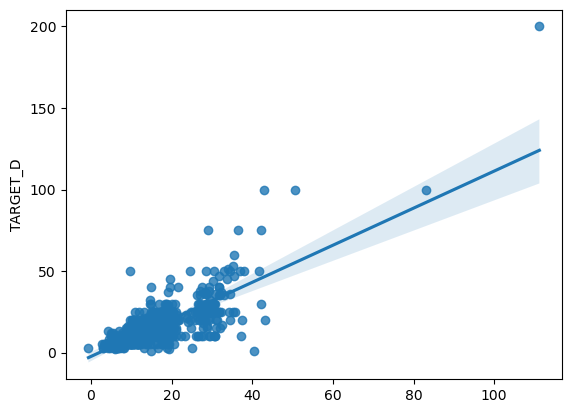

In [76]:
sns.regplot(x=predictions, y=y_test)

##### Quick test without outliers:

In [77]:
data_final_nozeros = data_final[(data_final["TARGET_D"] > 0) & (data_final["TARGET_D"] < 80)]

X = data_final_nozeros.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = data_final_nozeros["TARGET_D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.5314363391486718
MAE: 3.9690412083009194
RMSE: 6.213110190640994


<Axes: ylabel='TARGET_D'>

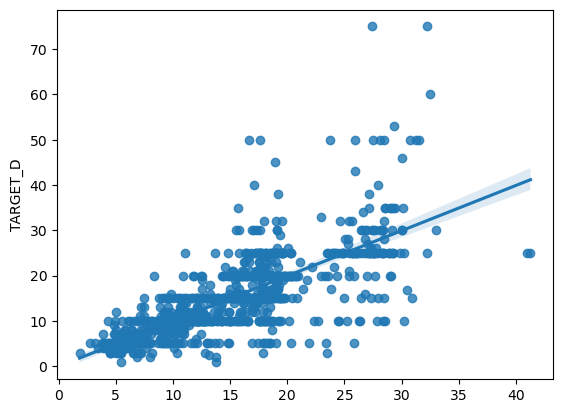

In [78]:
sns.regplot(x=predictions, y=y_test)

**Conclusions:**
* Due to the small difference in metrics between keeping or removing outliers, we'll keep them for now.
* We should spend more time analysing the features and understanding the relationships with the target, but for now let's pretend we are partly satisfied with the result and move on to feature selection.

#### Feature Selection
Feature selection can be:
* Adding features to the dataset by gathering them from the data available (gather information outside the dataset we have here);
* Removing features we have in the dataset to reduce noise or avoid multi-colinearity.

OBS.: <br>
*Feature Engineering:* transforming data from your dataset. <br>
*Feature Extraction:* extracting a new column from the existing data. <br>
*Feature Selection:* adding features or discarding the ones you won't need. <br>

##### **Feature Importance**
It is a quick and safe way of removing features that your model didn't need.<br> We will select the features based on the importance calculated by the model itself:

In [79]:
X = data_final_nozeros.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = data_final_nozeros["TARGET_D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.5314363391486718
MAE: 3.9690412083009194
RMSE: 6.213110190640994


Check the documentation of the model to see if they have a .feature_importance_ attribute, LinearRegression doesn't have it, but we can use the values of the coefficients:

In [80]:
data_importance = pd.Series(lr.coef_, index=X_train.columns)
data_importance.sort_values(ascending=False)

1    1.231786e+13
2    1.050377e+13
3    1.048985e+13
4    1.039083e+13
2    1.034664e+13
         ...     
S   -8.926112e+12
G   -1.209403e+13
D   -1.252420e+13
E   -1.604750e+13
F   -1.738285e+13
Length: 66, dtype: float64

From the above result, we can choose the top *N* columns to train our model and check if the metrics stay similar:

In [81]:
X = data_final_nozeros[data_importance[:10].index]
y = data_final_nozeros["TARGET_D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.01459060404408008
MAE: 6.67610421677775
RMSE: 9.010172453506451


<Axes: ylabel='TARGET_D'>

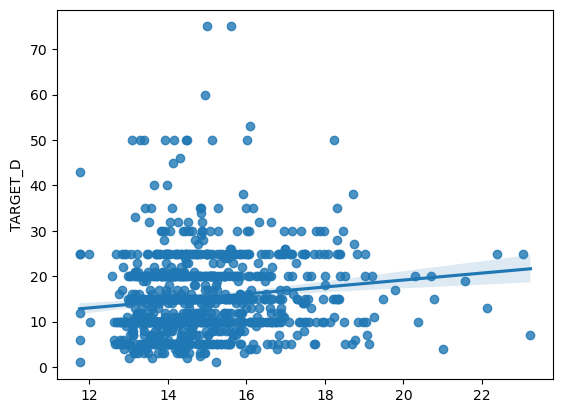

In [82]:
sns.regplot(x=predictions, y=y_test)

**Early Conclusions:** The results got a little better, by removing a few non-important columns we have reduced noise and multi-collinearity.

##### **Correlations:**

In [83]:
# Checking relationship between features and target:
data_final.corr()['TARGET_D'].sort_values(ascending=False)[:50]

TARGET_D        1.000000
LASTGIFT        0.061678
AVGGIFT         0.044299
MDMAUD_other    0.042896
HV2             0.039860
HV1             0.039081
IC5             0.037328
IC4             0.035952
G               0.035907
IC2             0.035496
IC3             0.033786
IC1             0.031780
HV3             0.030915
HV4             0.030867
STATE_CA        0.026681
NUMPRM12        0.025134
1               0.023309
RECP3_X         0.020673
NUMPROM         0.017337
INCOME          0.016777
CARDPM12        0.016358
CONTROLN        0.013366
S               0.013275
CARDPROM        0.011302
2               0.009519
STATE_OR        0.006499
NGIFTALL        0.004899
GENDER_O        0.004647
STATE_WA        0.004573
GENDER_M        0.003989
TIMELAG         0.003979
STATE_CO        0.003580
VETERANS_Y      0.002392
STATE_AZ        0.002159
STATE_SC        0.001565
STATE_MI        0.000411
4               0.000144
U              -0.000197
STATE_other    -0.000373
STATE_FL       -0.001357


In [84]:
# Checking Multi-Colinearity between features:
correlations_matrix = data_final.corr()
correlations_matrix = correlations_matrix[((correlations_matrix > .8) | (correlations_matrix < -.8))]
correlations_matrix.fillna(0)[:20]

,CONTROLN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D,C,U,S,R,T,2,4,3,1,2,1,E,D,L,3,G,4,F,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_FL,STATE_GA,STATE_IA,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MI,STATE_MN,STATE_MO,STATE_NC,STATE_OK,STATE_OR,STATE_SC,STATE_TN,STATE_TX,STATE_WA,STATE_WI,STATE_other,MDMAUD_other,RECP3_X,GENDER_M,GENDER_O,HOMEOWNR_U,VETERANS_Y
CONTROLN,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INCOME,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HV1,0.0,0.0,1.000000,0.993412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HV2,0.0,0.0,0.993412,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HV3,0.0,0.0,0.000000,0.000000,1.000000,0.941277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HV4,0.0,0.0,0.000000,0.000000,0.941277,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IC1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.951252,0.975308,0.929737,0.805823,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IC2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.951252,1.000000,0.955143,0.973616,0.873939,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IC3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.975308,0.955143,1.000000,0.971395,0.839304,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IC4,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.929737,0.973616,0.971395,1.000000,0.882082,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


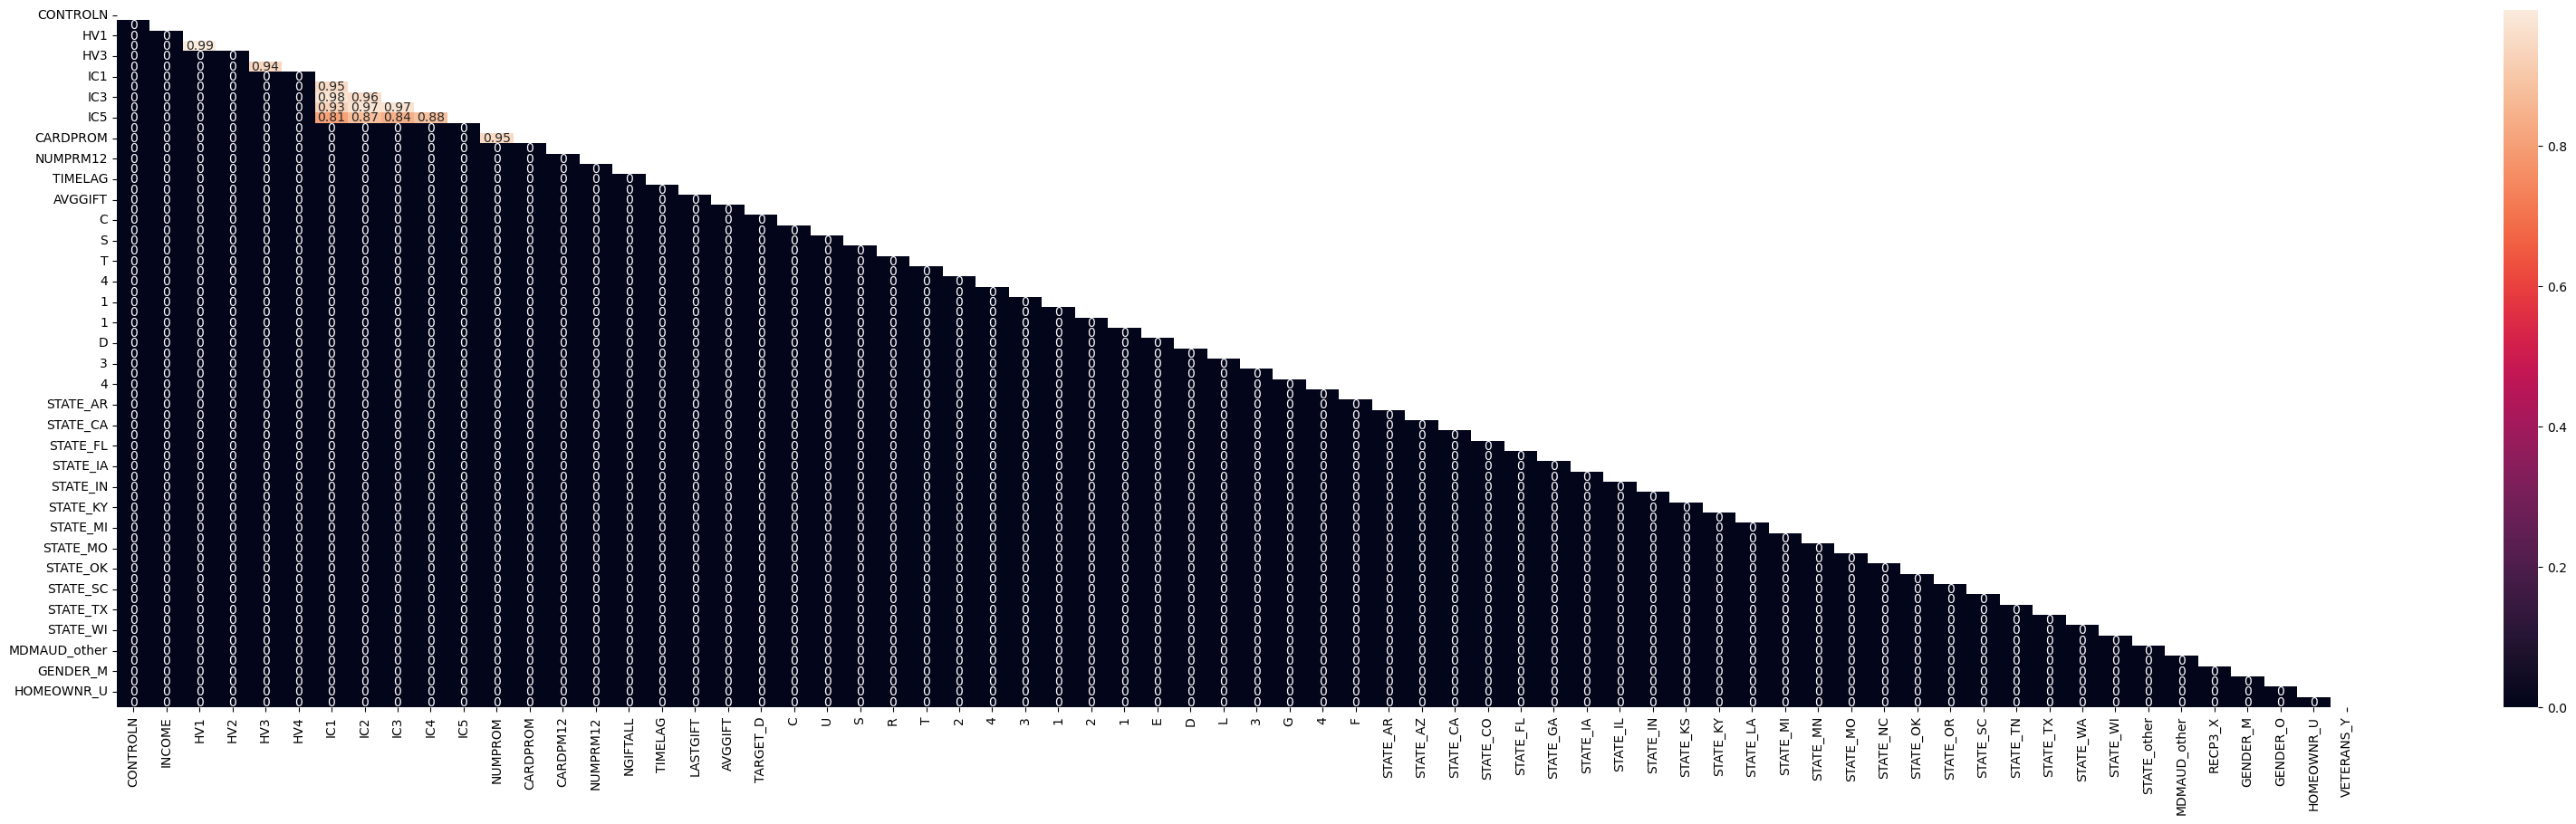

In [85]:
# Trying a heatmap to help visualize:
correlations_matrix = correlations_matrix.fillna(0)
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(40, 10))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

From the above we could remove columns with high colinearity, such as: HV1, IC3 and CARDPROM.

##### **Chi-Square Test**

Chi-square test is used to determine if there is a significant relationship between two categorical variables. The test is based on a contingency table. The frequency of categories in a variable is compared to the frequencies of categories in another variable.

The order in which frequencies are put in the table does not change the result of the chi-square test, so it won't consider the hierarchy for ordinal categoricals.

Contingency Table:

![](https://i.stack.imgur.com/8YuSA.jpg)

In [86]:
# Contingency Table:
data_crosstab = pd.crosstab(data['DOMAIN'], data['RFA_2'], margins=True)
data_crosstab

RFA_2,L1E,L1F,L1G,L2E,L2F,L2G,L3D,L3E,L3F,L3G,L4D,L4E,L4F,L4G,All
DOMAIN,,,,,,,,,,,,,,,
,169,611,299,147,266,134,65,180,97,35,112,105,59,37,2316
C1,260,1921,955,304,733,341,132,465,253,121,234,245,115,66,6145
C2,438,2519,1025,467,956,398,227,693,296,159,472,353,180,81,8264
C3,320,1668,615,311,581,208,168,432,170,56,352,246,114,39,5280
R1,62,446,196,57,164,77,29,122,55,24,51,39,24,12,1358
R2,822,4178,1572,822,1530,610,435,1133,502,195,813,587,299,125,13623
R3,324,1538,450,304,515,186,176,405,151,59,345,217,103,36,4809
S1,435,3809,1953,450,1310,726,212,811,457,219,409,370,226,116,11503
S2,422,2744,1048,426,1048,335,206,718,344,130,439,383,213,74,8530


With the contingency table we can check if these two variables are dependent or independent from each other.

OFC we won't be checking that with our eyes. A nice way to 'measure' the dependency between the variables is a chi-squared test:

In [87]:
from scipy.stats import chi2_contingency

stats, p_value, dof, frequencies = chi2_contingency(data_crosstab)
p_value  # the result is a low p_value ( < 0.05), so we can assume relationship between the variables

1.4664726998071514e-177

The p_value is used for hypothesis testing and it can be used to measure dependency between two variables.

A low p_value means that there is significant relationship between two variables.

A reasonable threshold for p_value is 0.05, and it's related to a confidence interval of 95%. But all this is subject for another class :)

**For now:** a p_value below 0.05 means that there is some dependency between two variables, and might indicate that one of them can be dropped without decreasing the metrics of the model.

A more ludicrous example [here](https://statisticsbyjim.com/hypothesis-testing/chi-square-test-independence-example/).

In [88]:
# Applying to all pairs:

pairs = []

for i in data.select_dtypes("object").columns:
  for j in data.select_dtypes("object").columns:
    if i != j:
      data_crosstab = pd.crosstab(data[i], data[j], margins=True)
      stats, p_value, dof, frequencies = chi2_contingency(data_crosstab)
      if (i,j,p_value) not in pairs and (j,i,p_value) not in pairs and p_value < .05:
        pairs.append((i, j, p_value))

sorted_pairs = sorted(pairs, key=lambda x: x[2])
sorted_pairs

[('STATE', 'DOMAIN', 0.0),
 ('GENDER', 'HOMEOWNR', 0.0),
 ('DOMAIN', 'HOMEOWNR', 0.0),
 ('HOMEOWNR', 'VETERANS', 0.0),
 ('RECP3', 'DOMAIN', 2.2011933965764286e-193),
 ('MDMAUD', 'RFA_2', 2.9393670606519984e-192),
 ('DOMAIN', 'RFA_2', 1.4664726998071514e-177),
 ('GENDER', 'VETERANS', 1.6654592673578657e-171),
 ('STATE', 'HOMEOWNR', 2.2074138279757e-147),
 ('HOMEOWNR', 'STATE', 2.2074138279757008e-147),
 ('DOMAIN', 'MDMAUD', 4.41491519951331e-70),
 ('MDMAUD', 'DOMAIN', 4.414915199513561e-70),
 ('RFA_2', 'STATE', 1.3703704800976532e-49),
 ('STATE', 'RFA_2', 1.3703704800978092e-49),
 ('GENDER', 'RFA_2', 6.073483612862808e-47),
 ('GENDER', 'DOMAIN', 4.573494169485686e-30),
 ('GENDER', 'STATE', 3.3816999350179664e-23),
 ('STATE', 'GENDER', 3.381699935018061e-23),
 ('DOMAIN', 'VETERANS', 2.704332880888217e-18),
 ('VETERANS', 'DOMAIN', 2.704332880888258e-18),
 ('RECP3', 'HOMEOWNR', 1.7489267925713216e-12),
 ('VETERANS', 'STATE', 2.448977584862351e-09),
 ('STATE', 'VETERANS', 2.4489775848623868

In [89]:
from collections import Counter

Counter([i for i, j, p in sorted_pairs] + [j for i, j, p in sorted_pairs])

Counter({'STATE': 9,
         'GENDER': 6,
         'DOMAIN': 9,
         'HOMEOWNR': 7,
         'RECP3': 3,
         'MDMAUD': 3,
         'RFA_2': 8,
         'VETERANS': 7})

From the above, we can see that STATE and DOMAIN, for example, have significant relationship with 9 other categorical features, so removing them might not affect negativelly our model. It is still not perfect and there is a risk that the categorical columns were not collinear.

##### **VIF - Variance Inflation Factor**

VIF is used to calculate multicolinearity between features, helping on the feature selection. For that purpose, you won't have the target variable in the calculation. You can use it for numerical features and encoded/dummified categorical features.

While the correlation methods we've seen so far (pearson, spearman, etc) calculates the correlation of one variable vs another, VIF checks correlation of many variables vs another.

VIF uses variation, which is calculated using the standard deviation, to return a measure of "explainability" of several features against another. How much of the spread of values from that variable can be "explained" or "predicted" by the other variables.

It is calculated through linear regression. For each feature you can imagine that a linear regression is made where that feature is considered the "target variable" and the other variables are considered the features.

The rule of thumb is that features with VIF above 10 could be dropped without decreasing the metrics of your model, but I don't buy it... so make sure you always test your metrics before and after dropping the columns :)

**IMPORTANT:** Everytime you drop a column, you need to re-calculate the VIF, because it will affect the factors from all the other columns.

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# vif uses OLS to calculate the factor, so we don't have the intercept
# that's why we need to assign it:
vif = add_constant(data_final)

# To remove multicolinearity automatically:
threshold = 10

while True:
    # calculates vif
    values = [variance_inflation_factor(np.array(vif), i)
              for i in range(len(vif.columns))][1:]
    display(pd.DataFrame(values, index=vif.columns[1:]).sort_values(0))
    # checks if the highest vif is bigger than the threshold
    if max(values) > threshold:
        # finds the column that has the maximum vif
        col_index = values.index(max(values)) + 1
        column_name = vif.columns[col_index]
        # drops that column
        vif = vif.drop(column_name, axis=1)
    else:
        break

vif

,0
L,0.000000
TARGET_D,1.007841
VETERANS_Y,1.034926
TIMELAG,1.055351
GENDER_M,1.059322
...,...
G,inf
4,inf
F,inf
4,inf


,0
L,0.000000
TARGET_D,1.007841
VETERANS_Y,1.034926
TIMELAG,1.055351
GENDER_M,1.059322
...,...
1,inf
E,inf
D,inf
G,inf


,0
L,0.000000
TARGET_D,1.007780
VETERANS_Y,1.034910
TIMELAG,1.055348
GENDER_M,1.059321
...,...
HV2,97.588217
D,inf
E,inf
F,inf


,0
TARGET_D,1.007780
VETERANS_Y,1.034910
TIMELAG,1.055348
GENDER_M,1.059321
GENDER_O,1.073875
...,...
IC4,73.540193
IC3,88.907882
HV1,90.524265
HV2,97.588217


,0
TARGET_D,1.040083
GENDER_O,1.132301
VETERANS_Y,1.160734
RECP3_X,1.214889
MDMAUD_other,1.241543
...,...
HV2,236.566225
IC2,266.663039
IC1,271.484573
IC4,531.623134


,0
TARGET_D,1.040083
GENDER_O,1.132092
VETERANS_Y,1.160674
RECP3_X,1.214888
MDMAUD_other,1.241481
...,...
NUMPROM,165.459658
IC4,184.340221
IC2,187.980287
HV1,204.149493


,0
TARGET_D,1.040078
GENDER_O,1.132066
VETERANS_Y,1.160650
RECP3_X,1.214753
MDMAUD_other,1.241353
4,1.257247
STATE_AR,1.411476
3,1.451215
STATE_IA,1.456628
STATE_KS,1.520371


,0
TARGET_D,1.040055
GENDER_O,1.132048
VETERANS_Y,1.160648
RECP3_X,1.214728
MDMAUD_other,1.241344
4,1.257107
STATE_AR,1.410739
3,1.450609
STATE_IA,1.456628
STATE_KS,1.520345


,0
TARGET_D,1.039993
GENDER_O,1.132034
VETERANS_Y,1.160589
RECP3_X,1.208848
MDMAUD_other,1.232310
4,1.257073
STATE_AR,1.409924
3,1.449967
STATE_IA,1.456609
STATE_KS,1.519460


,0
TARGET_D,1.039965
GENDER_O,1.131941
VETERANS_Y,1.160588
RECP3_X,1.207947
MDMAUD_other,1.232242
4,1.253234
STATE_AR,1.403562
3,1.439348
STATE_IA,1.442849
STATE_KS,1.507991


,0
TARGET_D,1.039953
GENDER_O,1.131925
VETERANS_Y,1.160585
RECP3_X,1.207947
MDMAUD_other,1.232242
4,1.252098
STATE_AR,1.403392
3,1.438589
STATE_IA,1.442841
STATE_KS,1.507989


,0
TARGET_D,1.039848
GENDER_O,1.131744
RECP3_X,1.145547
VETERANS_Y,1.160498
MDMAUD_other,1.217876
4,1.251377
STATE_AR,1.381655
STATE_IA,1.410169
3,1.430867
STATE_SC,1.476009


,0
TARGET_D,1.039841
GENDER_O,1.131303
RECP3_X,1.145495
VETERANS_Y,1.160439
MDMAUD_other,1.217850
4,1.251099
STATE_AR,1.381631
STATE_IA,1.408228
3,1.423141
STATE_SC,1.473272


,0
TARGET_D,1.039838
GENDER_O,1.130154
RECP3_X,1.143935
VETERANS_Y,1.160240
MDMAUD_other,1.215946
4,1.251070
STATE_AR,1.375462
STATE_IA,1.396187
3,1.422333
STATE_SC,1.454869


,0
TARGET_D,1.039698
GENDER_O,1.129999
RECP3_X,1.143914
VETERANS_Y,1.160240
MDMAUD_other,1.215763
4,1.249599
STATE_AR,1.370696
STATE_IA,1.384539
3,1.416294
STATE_SC,1.447252


,0
TARGET_D,1.039679
RECP3_X,1.105415
GENDER_O,1.129999
VETERANS_Y,1.158686
MDMAUD_other,1.201484
4,1.249381
STATE_AR,1.286578
STATE_IA,1.306590
STATE_KS,1.363667
STATE_SC,1.372104


,0
TARGET_D,1.039674
RECP3_X,1.105061
GENDER_O,1.129783
VETERANS_Y,1.158488
MDMAUD_other,1.201435
4,1.242131
STATE_AR,1.270700
STATE_IA,1.284507
STATE_KS,1.336297
STATE_SC,1.338843


,CONTROLN,INCOME,HV1,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D,U,S,R,T,4,3,1,1,D,3,G,4,F,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_FL,STATE_GA,STATE_IA,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MI,STATE_MN,STATE_MO,STATE_NC,STATE_OK,STATE_OR,STATE_SC,STATE_TN,STATE_TX,STATE_WA,STATE_WI,STATE_other,MDMAUD_other,RECP3_X,GENDER_M,GENDER_O,HOMEOWNR_U,VETERANS_Y
0,95515,0.0,479,31,4.0,10.0,7.741935,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,148535,6.0,5468,3,18.0,25.0,15.666667,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,15078,3.0,497,27,12.0,5.0,7.481481,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,172556,1.0,1000,16,9.0,10.0,6.812500,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,7112,3.0,576,37,14.0,15.0,6.864865,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,184568,0.0,988,1,6.0,25.0,25.000000,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
95408,122706,7.0,1679,1,6.0,20.0,20.000000,0.0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
95409,189641,0.0,376,7,3.0,10.0,8.285714,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
95410,4693,7.0,2421,41,4.0,18.0,12.146341,18.0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
# We migth be able to remove the following columns:
[col for col in data_final.columns if col not in vif]

['HV2',
 'HV3',
 'HV4',
 'IC1',
 'IC2',
 'IC3',
 'IC4',
 'IC5',
 'NUMPROM',
 'CARDPROM',
 'CARDPM12',
 'NUMPRM12',
 'C',
 '2',
 '2',
 'E',
 'L']

In [92]:
# Manually, just to see what the code is doing:

vif_ = pd.DataFrame(index=vif.columns)

vif_["VIF Factor"] = [round(variance_inflation_factor(np.array(vif), i),2)
                     for i in range(len(vif.columns))]

vif_.sort_values("VIF Factor")

,VIF Factor
TARGET_D,1.04
RECP3_X,1.11
GENDER_O,1.13
VETERANS_Y,1.16
MDMAUD_other,1.20
4,1.24
STATE_AR,1.27
STATE_IA,1.28
STATE_KS,1.34
STATE_SC,1.34


From the above techniques, I would go for VIF for now, since it's reasonably simple to use and works for numericals and categoricals. Also it is more concrete on terms of finding multicollinearity if compared to the chi-square test. According to VIF, the columns to remove would be: ['HV2','HV3','HV4','IC1','IC2','IC3','IC4','IC5','NUMPROM','CARDPROM','CARDPM12','NUMPRM12','T','3','3','L','F']

Let's train a model removing the columns suggested by VIF. The objective is to compare the results with the previous models, the model trained without feature selection and the model trained using Feature Importance to select the features:

In [ ]:
data_selected = data_final.drop(['HV2','HV3','HV4','IC1','IC2','IC3','IC4','IC5','NUMPROM','CARDPROM','CARDPM12','NUMPRM12','T','3','3','L','F'], axis=1)

data_final_nozeros = data_selected[data_selected["TARGET_D"] > 0]

X = data_final_nozeros.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = data_final_nozeros["TARGET_D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

In [ ]:
sns.regplot(x=predictions, y=y_test)

**Conclusions:**
* As "promised", removing the columns didn't change the metrics too much;
* From the techniques used, choosing according to the Feature Importance worked better;
* When possible, use Feature Importance to remove less important features.

For now, let's pretend we are satisfied with the results for the regression part of the problem.

***TO BE CONTINUED...***